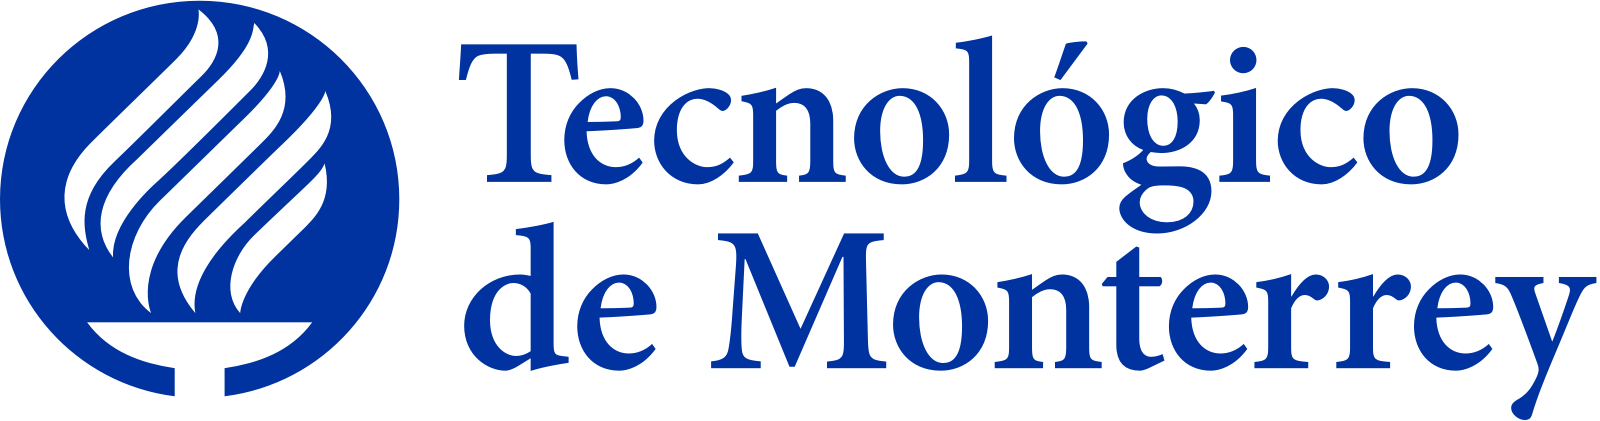

## Ciencia y analítica de datos - Semana 4
### Profesor: Jobish Vallikavungal Devassia

### Elber Aguilar Pérez - AO1793568
### Fernando Israel Correa Mendoza A01793869

## Parte 1: Ejercicio guiado - Principal components analysis (PCA)

In [2]:
# Importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [54]:
# importamos dataset

# importamos bd a un dataframe de pandas

dataset = pd.read_csv('default of credit card clients.csv', index_col = 0) # leemos archivo csv
dataset.index.name = None
dataset.head(5) # obtenemos las primeras filas de la bd

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [55]:
# creamos una copia del df origina 

df = dataset.copy()
df


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [56]:
# obtenemos shape del df

df.shape

(30000, 24)

In [58]:
# obtenemos una descripción de los datos

df.describe()

,Amount Credit,Gender,Education,Marital,Age,PP-Sep,PP-Aug,PP-Jul,PP-Jun,PP-May,...,AB-Jun,AB-May,AB-Apr,APP-Sep,APP-Aug,APP-Jul,APP-Jun,APP-May,APP-Apr,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [59]:
# Renombramos las variables 
# pp - past payment
# ab - amount bill 
# app - Amount previous payment

col_names = {"X1":"Amount Credit", "X2":"Gender", "X3":"Education", "X4":"Marital", "X5":"Age", "X6":"PP-Sep", "X7":"PP-Aug", "X8":"PP-Jul", 
             "X9":"PP-Jun", "X10":"PP-May", "X11":"PP-Apr", "X12":"AB-Sep", "X13":"AB-Aug", "X14":"AB-Jul", "X15":"AB-Jun", "X16":"AB-May", 
             "X17":"AB-Apr", "X18":"APP-Sep", "X19":"APP-Aug", "X20":"APP-Jul", "X21":"APP-Jun", "X22":"APP-May", "X23":"APP-Apr" }

df.rename(columns=col_names, inplace=True)
df

,Amount Credit,Gender,Education,Marital,Age,PP-Sep,PP-Aug,PP-Jul,PP-Jun,PP-May,...,AB-Jun,AB-May,AB-Apr,APP-Sep,APP-Aug,APP-Jul,APP-Jun,APP-May,APP-Apr,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [64]:
# Creamos un nuevo df, excluyendo las variables ID, Y

df1 = df.iloc[:, 0:23]
df1
df1.shape

(30000, 23)

<AxesSubplot:>

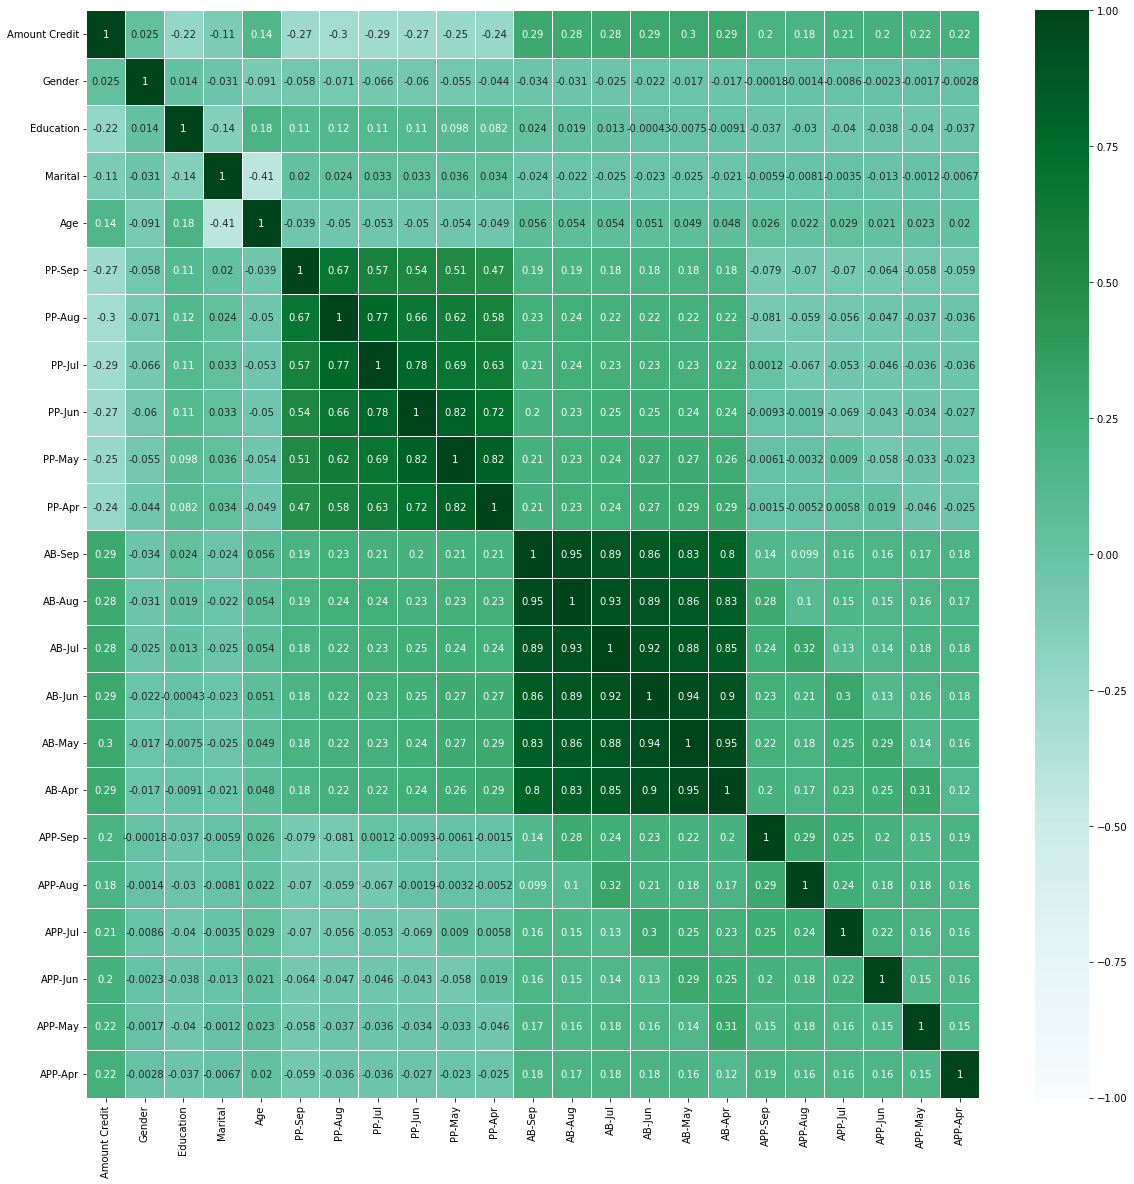

In [65]:
# Validamos la correlación entre las variables 
# pp - past payment
# ab - amount bill 
# app - Amount previous payment
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap="BuGn", linewidths=0.5)

* Como podemos observar existe correlación alta entre las variables del mismo tipo.
* Una correlación baja entre Amount Credit vs las variables de historicos (Sep - Abril)

In [71]:
## Calculamos la varianza total del set de datos 

v_total = df1.var().sum()
print("Total variance: ", v_total.round(2))

Total variance:  45432389013.37



Al tener una varianza tan alta, por la composición de nuestros datos, al aplicar PCA nos generera un error de que nuestros datos son demasiado grandes, debemos primero normalizar nustras variables.


## Normalizamos nuestros datos

In [68]:
# Obtenemos el nombre de las columnas

df1.columns

Index(['Amount Credit', 'Gender', 'Education', 'Marital', 'Age', 'PP-Sep',
       'PP-Aug', 'PP-Jul', 'PP-Jun', 'PP-May', 'PP-Apr', 'AB-Sep', 'AB-Aug',
       'AB-Jul', 'AB-Jun', 'AB-May', 'AB-Apr', 'APP-Sep', 'APP-Aug', 'APP-Jul',
       'APP-Jun', 'APP-May', 'APP-Apr'],
      dtype='object')

In [76]:
# Eliminamos todos los valores NaN o nulos de nuestros dataset

df1=df1.dropna()

df1.isnull().sum().sum()



0

In [106]:
## Aplicamos PCA sobre el conjunto de datos originales

pcs = PCA(n_components=23)
pcs.fit(df1)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Standard deviation,166585.075260,115824.701663,37256.816553,27747.103019,20698.682257,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,...,9.118055e+00,2.062793e+00,9.388332e-01,7.529159e-01,7.313989e-01,5.962443e-01,5.121485e-01,4.940197e-01,4.592518e-01,4.185387e-01
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,...,1.829231e-09,9.362147e-11,1.939283e-11,1.247261e-11,1.176990e-11,7.821908e-12,5.771066e-12,5.369734e-12,4.640513e-12,3.854212e-12
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Podemos observar que existe una variación alta entre las diferentes variables, por lo que lo recomendable es realizar una normalización.

### Scree Plot

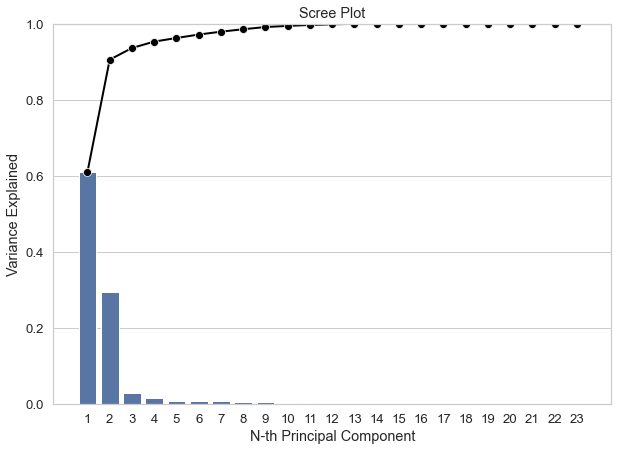

In [107]:
PC_components = np.arange(pcs.n_components_) + 1


_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Notamos que los tres primeros componentes acumulan el 93,63% del total de varianza asociada con las 23 variables originales.

* Vemos que el PC1 - Amount credit es del 60% del total de la varianza.
* Lo que entendemos es que PC1 nos dice como ha sido el comportamiento de los pagos respecto al monto prestado.
* PC2 nos indica la relación entre los prestamos y el genero. 

Las dos variables se expresan en diferentes medidas, por lo que lo recomendable es realizar un escalado de estas variables.

In [108]:
((pcsSummary_df.iloc[2][2])*100).round(2)

93.63

In [110]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,...,9.1181,2.0628,0.9388,0.7529,0.7314,0.5962,0.5121,0.494,0.4593,0.4185
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000


In [91]:
pcs.components_

array([[ 4.91051249e-01, -3.60183560e-08, -3.66863368e-07,
        -1.91693911e-07,  5.56462827e-06,  3.44159275e-07,
         5.70426106e-07,  5.84697827e-07,  6.67552613e-07,
         7.61271023e-07,  8.37911287e-07,  3.88614777e-01,
         3.81500219e-01,  3.72316835e-01,  3.46509376e-01,
         3.23011793e-01,  3.08673561e-01,  2.65507164e-02,
         3.12770650e-02,  2.68070179e-02,  2.21621169e-02,
         2.21853695e-02,  2.48009681e-02],
       [ 8.69327754e-01,  1.73905429e-07, -1.49968009e-06,
        -4.00325888e-07,  8.29040076e-06, -3.80425812e-06,
        -4.62046631e-06, -4.49870552e-06, -4.25800662e-06,
        -4.02895450e-06, -3.98194484e-06, -2.21093578e-01,
        -2.26152724e-01, -2.16301840e-01, -1.93842429e-01,
        -1.76598449e-01, -1.67159508e-01,  5.71363887e-03,
         1.08089432e-02,  1.09872540e-02,  1.03870690e-02,
         1.16983563e-02,  1.53688818e-02],
       [-2.05568405e-02,  3.26050600e-07, -9.71580370e-07,
         7.38143866e-08, -4.1

In [111]:
# obtención PC1 - PC3 que suman el 93,60%

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df1.iloc[:, 0:].columns
                                )
pcsComponents_df.iloc[:,:3]

,PC1,PC2,PC3
Amount Credit,4.910512e-01,8.693278e-01,-2.055684e-02
Gender,-3.601836e-08,1.739054e-07,3.260506e-07
Education,-3.668634e-07,-1.499680e-06,-9.715804e-07
Marital,-1.916939e-07,-4.003259e-07,7.381439e-08
Age,5.564628e-06,8.290401e-06,-4.101474e-06
PP-Sep,3.441593e-07,-3.804258e-06,-4.165337e-07
PP-Aug,5.704261e-07,-4.620466e-06,-5.837432e-07
PP-Jul,5.846978e-07,-4.498706e-06,5.099712e-07
PP-Jun,6.675526e-07,-4.258007e-06,2.096678e-06
PP-May,7.612710e-07,-4.028954e-06,3.450833e-06


In [112]:
# todas PC obtenidos de los datos originales 

pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df1.iloc[:, 0:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Amount Credit,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02,-4.412772e-02,1.689850e-02,-1.113634e-03,1.027832e-03,9.471739e-03,3.750819e-03,...,-1.037909e-05,0.000008,-5.824365e-07,1.443837e-06,-3.483612e-07,-2.038085e-07,-3.347323e-08,3.762458e-07,2.638601e-07,4.891053e-08
Gender,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08,-3.668197e-07,2.023762e-07,1.698048e-07,1.768554e-07,-1.321406e-07,1.200907e-07,...,-5.101767e-03,-0.015304,1.199551e-02,5.692290e-02,-2.355976e-02,-9.524443e-03,-8.384565e-02,-8.271520e-01,5.514321e-01,-2.054142e-02
Education,-3.668634e-07,-1.499680e-06,-9.715804e-07,2.080063e-07,4.527315e-07,9.305090e-08,-6.318617e-07,-4.174017e-08,1.693236e-07,-2.996884e-07,...,1.809119e-02,0.016276,-2.820662e-02,9.756383e-01,-1.788843e-01,-1.599582e-02,-9.736845e-03,1.076489e-01,5.276090e-02,4.463954e-03
Marital,-1.916939e-07,-4.003259e-07,7.381439e-08,9.660929e-08,6.632308e-07,-2.901973e-07,1.701102e-07,-4.021665e-07,-2.988025e-07,-2.743981e-08,...,-2.309951e-02,-0.002358,1.276279e-02,-1.005385e-01,1.876048e-02,1.698669e-02,6.156939e-03,5.461234e-01,8.307925e-01,-6.683640e-03
Age,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07,-4.919226e-06,1.560179e-06,-1.473511e-06,-2.044437e-06,6.936249e-06,-2.084484e-07,...,9.995439e-01,0.004411,2.004442e-03,-1.969306e-02,3.796904e-03,3.248845e-04,-1.466722e-04,6.405165e-03,2.108164e-02,-8.320145e-04
PP-Sep,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06,-3.362837e-06,2.184932e-06,-1.801390e-06,7.901413e-07,-8.311204e-07,2.311084e-06,...,-6.500597e-04,0.327271,-6.275200e-01,-1.340782e-01,-6.174001e-01,2.801062e-01,-1.437953e-01,5.220351e-03,-5.176864e-05,-2.807440e-02
PP-Aug,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06,-2.039644e-06,2.113731e-06,-2.639450e-06,6.918592e-07,-2.074728e-06,1.219987e-06,...,-1.695506e-03,0.415760,-4.357438e-01,2.882034e-02,2.829812e-01,-5.807030e-01,4.520285e-01,-3.642074e-02,3.827117e-02,1.096470e-01
PP-Jul,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06,-3.622823e-06,1.006594e-06,3.623000e-06,1.361339e-07,-1.919681e-06,3.779772e-07,...,-2.240967e-03,0.441994,-1.175360e-01,8.635494e-02,5.576935e-01,1.460985e-01,-6.210460e-01,3.338987e-02,-2.150978e-02,-2.524324e-01
PP-Jun,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07,-4.424635e-06,2.463802e-06,8.351550e-07,1.268560e-06,-2.735785e-06,2.397364e-06,...,-1.987660e-03,0.441968,2.325078e-01,4.102808e-02,1.495438e-01,5.749768e-01,3.244498e-01,-4.599669e-02,1.960960e-02,5.368308e-01
PP-May,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07,-4.182947e-06,-9.041447e-07,-8.252028e-07,-6.738915e-07,-1.921178e-06,4.290639e-06,...,-2.739733e-03,0.417746,3.883926e-01,-2.213474e-02,-1.956363e-01,4.652916e-02,3.463922e-01,-1.679252e-02,-1.362254e-03,-7.165417e-01


### Normalizamos antes de aplicar PCA

Para normalizar los datos utilizaremos MinMaxScaler y luego aplicaremos de nuevo PCA.

In [114]:
# Normalizamos utilizando MinMaxScaler 

scaler = preprocessing.MinMaxScaler().fit(df1)

In [118]:
df2 = scaler.fit_transform(df1)

In [119]:
df2

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [121]:
## Aplicamos PCA a los datos normalizados con MinMaxScaler
pcs = PCA()

pcs.fit(df2)

PCA()

In [122]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,0.4898,0.2496,0.2018,0.1548,0.1290,0.1192,0.0963,0.0887,0.0738,0.0602,...,0.0332,0.0317,0.0244,0.0208,0.0185,0.0155,0.0120,0.0104,0.0086,0.0062
Proportion of variance,0.5529,0.1436,0.0939,0.0552,0.0384,0.0327,0.0214,0.0181,0.0126,0.0084,...,0.0025,0.0023,0.0014,0.0010,0.0008,0.0006,0.0003,0.0003,0.0002,0.0001
Cumulative proportion,0.5529,0.6964,0.7903,0.8455,0.8839,0.9167,0.9381,0.9562,0.9688,0.9771,...,0.9931,0.9954,0.9968,0.9978,0.9986,0.9992,0.9995,0.9997,0.9999,1.0000


* Como podemos observar respecto a los datos originales, para completar el 93% de los tres primeros componentes, con los datos normalizados son necesarios siete PCA.

* Los tres primeros principal componenetes (PCA) representan el 79% del total de la variabilidad de los datos, por lo que reducir las variables a solo estas tres siginificaria perder mucha información.

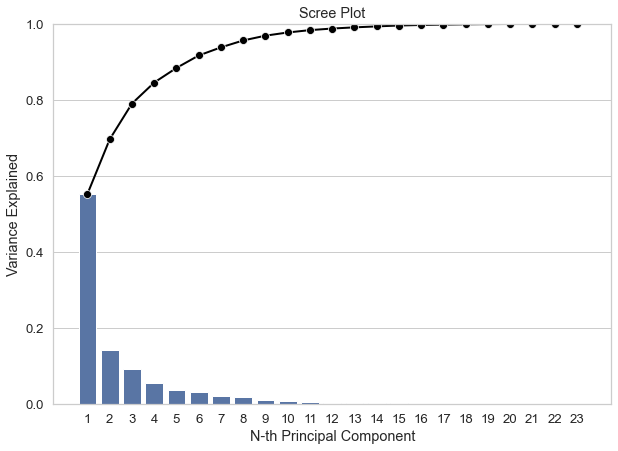

In [123]:
PC_components = np.arange(pcs.n_components_) + 1


_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## Obtención valores atipicos datos originales

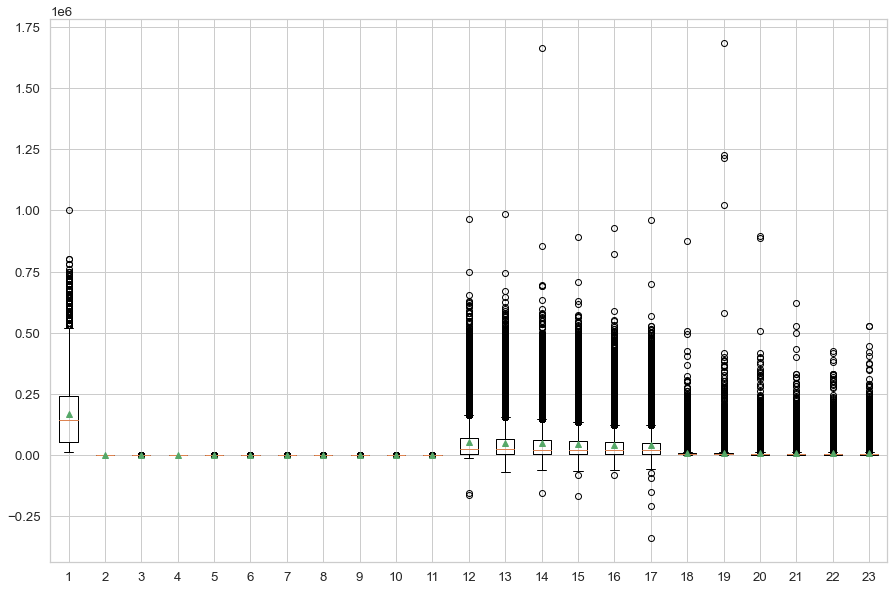

In [133]:
# Creamos boxplot para analizar los valores atipicos sobre los datos
fig, ax = plt.subplots(figsize=(15,10))
plt.boxplot(df1, showmeans=True)
plt.show()

## Obtención valores atipicos datos normalizados con MinMaxScaler

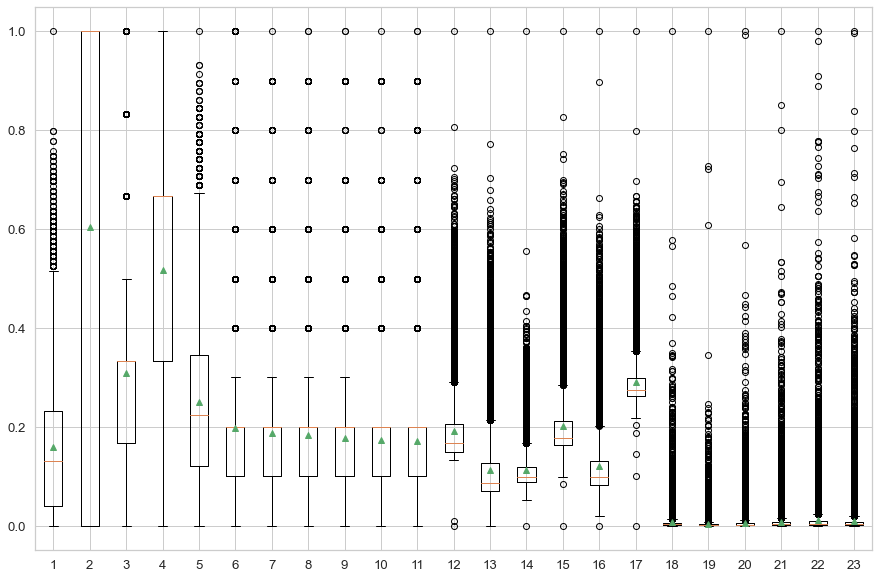

In [132]:
fig, ax = plt.subplots(figsize=(15,10))
plt.boxplot(df2, showmeans=True)
plt.show()

## Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
- El número minimo de componentes es 7 sobre los datos normalizados, el porque de esta desición es debido a que si se toma una cantidad menor, la perdida de varianza sobre los datos superaria el 10%.

¿Cuál es la variación de los datos que representan esos componentes?
- La variación de los datos acumulada es del 93.8%.

¿Cuál es la pérdida de información después de realizar PCA?
- La perdida de información se situa sobre el 6,2% sobre los datos normalizados despúes de aplicar PCA.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
- De las variables originales el Amount Credit (X1) tiene el 61% de varianza de los datos luego de aplicar PCA, la de menor importancia PCX23 cuyo varianza es del 0.0%.

- Es recomendable utilizar PCA cuando se tiene un número elevado de variables en un conjunto de datos y que nos ayude a entender mejor los datos.
-